In [1]:
#Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# filter for the job titles and country
df_GR = df[(df["job_country"] == "Greece")].dropna(subset=["salary_year_avg"])

In [3]:
job_titles = df_GR["job_title_short"].value_counts().index[:6].tolist()

job_titles

['Data Engineer',
 'Data Analyst',
 'Machine Learning Engineer',
 'Data Scientist',
 'Software Engineer',
 'Senior Data Scientist']

In [4]:
df_GR_top6 = df_GR[df_GR["job_title_short"].isin(job_titles)]

df_GR_top6

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
11741,Data Scientist,Junior Data Scientist,"Athens, Greece",via Ai-Jobs.net,Full-time,False,Greece,2023-01-16 14:07:22,False,False,Greece,year,64821.5,NaN,PeopleCert,"[python, azure, databricks, spark, power bi]","{'analyst_tools': ['power bi'], 'cloud': ['azu..."
15254,Senior Data Scientist,Senior Research Engineer,"Nea Smyrni, Greece",via Ai-Jobs.net,Full-time,False,Greece,2023-03-06 14:28:55,False,False,Greece,year,200000.0,NaN,WINGS-ICT-SOLUTIONS,"[word, excel, powerpoint]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
29149,Software Engineer,Senior Software Engineer (On Image Processing ...,"Paiania, Greece",via Ai-Jobs.net,Full-time,False,Greece,2023-06-29 14:02:41,False,False,Greece,year,89100.0,NaN,INTRALOT,"[go, tensorflow, linux]","{'libraries': ['tensorflow'], 'os': ['linux'],..."
58901,Data Analyst,Business Intelligence Engineer,"Athens, Greece",via Ai-Jobs.net,Full-time,False,Greece,2023-04-10 06:27:35,False,False,Greece,year,89100.0,NaN,Kaizen Gaming,"[python, sql, databricks, spark, tableau, flow]","{'analyst_tools': ['tableau'], 'cloud': ['data..."
80165,Data Scientist,Lead Data Scientist,"Athens, Greece",via Ai-Jobs.net,Full-time,False,Greece,2023-02-10 00:59:07,False,False,Greece,year,51068.0,NaN,iTechScope,"[python, spark, kafka, kubernetes, docker]","{'libraries': ['spark', 'kafka'], 'other': ['k..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749852,Data Analyst,Data Architect,"Athens, Greece",via Ai-Jobs.net,Full-time,False,Greece,2023-01-16 21:07:22,False,False,Greece,year,163782.0,NaN,Uni Systems,[express],{'webframeworks': ['express']}
752893,Data Engineer,Big Data Engineer,"Nea Smyrni, Greece",via Ai-Jobs.net,Full-time,False,Greece,2023-01-19 21:14:22,False,False,Greece,year,45000.0,NaN,INCELLIGENT,"[python, java, scala, sql, postgresql, mysql, ...","{'cloud': ['oracle', 'azure', 'aws'], 'databas..."
765797,Machine Learning Engineer,Machine Learning Engineer (Electricity Trading...,"Athens, Greece",via Ai-Jobs.net,Full-time,False,Greece,2023-04-05 01:50:57,False,False,Greece,year,104668.0,NaN,ManpowerGroup Greece,[python],{'programming': ['python']}
767505,Machine Learning Engineer,AI Engineer,"Athens, Greece",via Ai-Jobs.net,Full-time,False,Greece,2023-07-22 01:43:30,False,False,Greece,year,89100.0,NaN,Satori,"[python, azure, numpy, pandas, scikit-learn, p...","{'cloud': ['azure'], 'libraries': ['numpy', 'p..."


In [5]:
job_order = df_GR_top6.groupby("job_title_short")["salary_year_avg"].median().sort_values(ascending=False).index

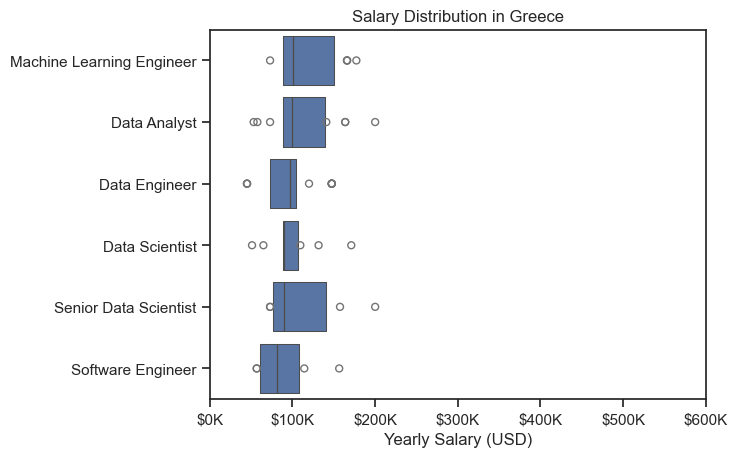

In [ ]:
sns.boxenplot(data=df_GR_top6, x="salary_year_avg", y="job_title_short", order=job_order)
sns.set_theme(style="ticks")

plt.title("Salary Distribution in Greece")
plt.xlabel("Yearly Salary (USD)")
plt.ylabel("")
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [7]:
df_DA_GR = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "Greece")].copy()

df_DA_GR = df_DA_GR.dropna(subset=["salary_year_avg"])

In [8]:
df_DA_GR = df_DA_GR.explode("job_skills")

df_DA_GR[["salary_year_avg", "job_skills"]].head(5)

,salary_year_avg,job_skills
58901,89100.0,python
58901,89100.0,sql
58901,89100.0,databricks
58901,89100.0,spark
58901,89100.0,tableau


In [9]:
df_DA_top_pay = df_DA_GR.groupby("job_skills")["salary_year_avg"].agg(["count", "median"]).sort_values(by="median", ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

In [10]:
df_DA_skills = df_DA_GR.groupby("job_skills")["salary_year_avg"].agg(["count", "median"]).sort_values(by="count", ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by="median", ascending=False)

df_DA_skills


,count,median
job_skills,,
java,3,140904.5
r,2,132141.0
python,8,119500.0
sql,8,98500.0
azure,3,98500.0
power bi,4,98500.0
sas,2,98500.0
flow,4,94800.0
tableau,4,81000.0


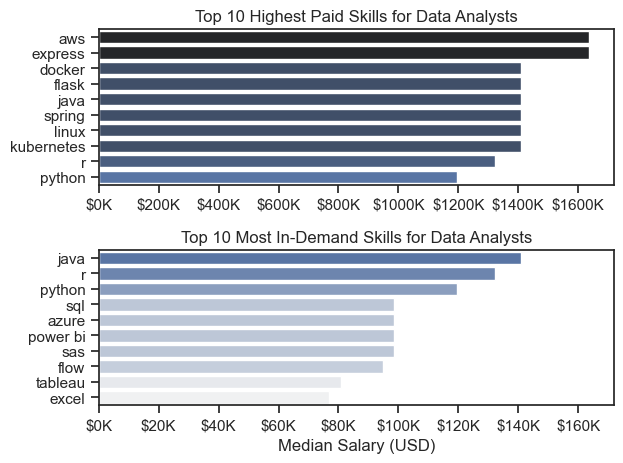

In [11]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style="ticks")

#Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x="median", y=df_DA_top_pay.index, hue="median", ax=ax[0], palette="dark:b_r")
ax[0].legend().remove()
#df_DA_top_pay[::-1].plot(kind="barh", y="median", ax=ax[0], legend=False)
ax[0].set_title("Top 10 Highest Paid Skills for Data Analysts")
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/100)}K"))


#Top 10 Most In-Demand Skills for Data Analysts
sns.barplot(data=df_DA_skills, x="median", y=df_DA_skills.index, hue="median", ax=ax[1], palette="light:b")
ax[1].legend().remove()
#df_DA_skills[::-1].plot(kind="barh", y="median", ax=ax[1], legend=False)
ax[1].set_title("Top 10 Most In-Demand Skills for Data Analysts")
ax[1].set_ylabel("")
ax[1].set_xlabel("Median Salary (USD)")
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()